### PRCP-1012-GameWinnerPred

### Problem Statement

#### Task 1:-
Prepare a complete data analysis report on the given data.
#### Task 2:-
Create a predictive model which is an attempt to predict the win probability of the Pubg match and to look at the important factors affecting the win probability of the pubg game. 

### Data Descritption

- **DBNOs**: The number of enemy players knocked down by the player.
- **Assists**: The number of enemies the player damaged who were then killed by teammates.
- **Boosts**: The number of boost items the player used.
- **DamageDealt**: Total damage dealt by the player (self-inflicted damage is excluded).
- **HeadshotKills**: The number of enemies killed with headshots.
- **Heals**: The number of healing items the player used.
- **Id**: The unique identifier for the player.
- **KillPlace**: The player's ranking in terms of kills in the match.
- **KillPoints**: A kills-based external ranking for the player (think of it like an El    o rating, but based only on kills). A value of 0 in killPoints should be considered as           "None" if there’s any value other than -1 in rankPoints.
- **KillStreaks**: The maximum number of enemies the player killed in a short time.
- **Kills**: The total number of enemy players the player killed.
- **LongestKill**: The longest distance (in meters) between the player and the enemy they killed at the time of death. This could be misleading, as it can include instances like downing an enemy and then leaving the area.
- **MatchDuration**: The duration of the match in seconds.
- **MatchId**: The unique identifier for the match. The training and testing sets don't share match IDs.
- **MatchType**: The game mode the data comes from, e.g., "solo", "duo", "squad", "solo-fpp", "duo-fpp", "squad-fpp", and other event or custom modes.
- **RankPoints**: A ranking system similar to Elo, based on kills. A value of -1 means "None" for the player.
- **Revives**: The number of times the player revived teammates.
- **RideDistance**: The total distance the player traveled in vehicles (measured in meters).
- **RoadKills**: The number of enemy players the player killed wneed any more details!

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams['figure.figsize']=(16,6)
import seaborn as sns

# handling warning 
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

!pip install catboost
import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


#### Reading the Data

In [5]:
df= pd.read_csv(r'C:\Users\ASUS\Desktop\Datamites internship\PRCP-1012-GameWinnerPred\Data\pubg.csv')

In [7]:
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [26]:
df.shape

(4446966, 29)

In [28]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [30]:
df.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [34]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [36]:
df.describe(include='all')

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4446966,4446966,4446966,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
unique,4446966,2026745,47965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,7f96b2f878858a,14d6b54cdec6bc,4b5db40aec4797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,74,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,NaN,NaN,NaN,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,NaN,NaN,NaN,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,NaN,NaN,NaN,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01


### Exploratory Data Analysis (EDA)

##### Task-1 Complete data analysis report on the given data


### Univariate Analysis

In [18]:
pip install sweetviz


In [14]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html('sweetviz_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### **Insights on Univariate Analysis:**

Univariate analysis focuses on analyzing one variable at a time to understand its distribution, central tendency, variability, and shape. Key insights include:

#### **- Central Tendency:**
- **Mean**, **Median**, and **Mode**: Measures the central value around which data is distributed, helping us understand the typical or average value.

#### **- Variability:**
- **Range**: The spread of values from minimum to maximum.
- **Standard deviation** and **variance**: Measure the dispersion of data points around the mean, showing consistency or volatility.

#### **- Distribution:**
- **Histogram**: Visualizes the distribution of the variable.
- **Skewness** and **kurtosis**: Show the symmetry and shape of the distribution, helping identify patterns or outliers.

#### **- Frequency Analysis:**
- **Count** or **frequency**: Shows how often different values or categories occur.
- **Mode**: Identifies the most frequent value, helping understand the common occurrence.

#### **- Summary Statistics:**
- **Quartiles** and **percentiles**: Show the spread of data and help with easy comparison and interpretation.

#### **- Outliers Detection:**
- **Box plots**: Visualize distribution and identify outliers that may require further investigation.

#### **- Distributions of Categorical Variables:**
Univariate analysis also helps in understanding the distribution of categorical variables.


#### - Bar charts: 
Univariate analysis of categorical variables typically involves creating bar charts to visualize the frequency distribution of different categories. This approach helps identify the most prevalent categories and assess their potential impact on the overall analysis. By performing univariate analysis, analysts can derive valuable insights into individual variables, providing a solid foundation for more advanced multivariate analysis and modeling techniques.

### Bivariate Analysis

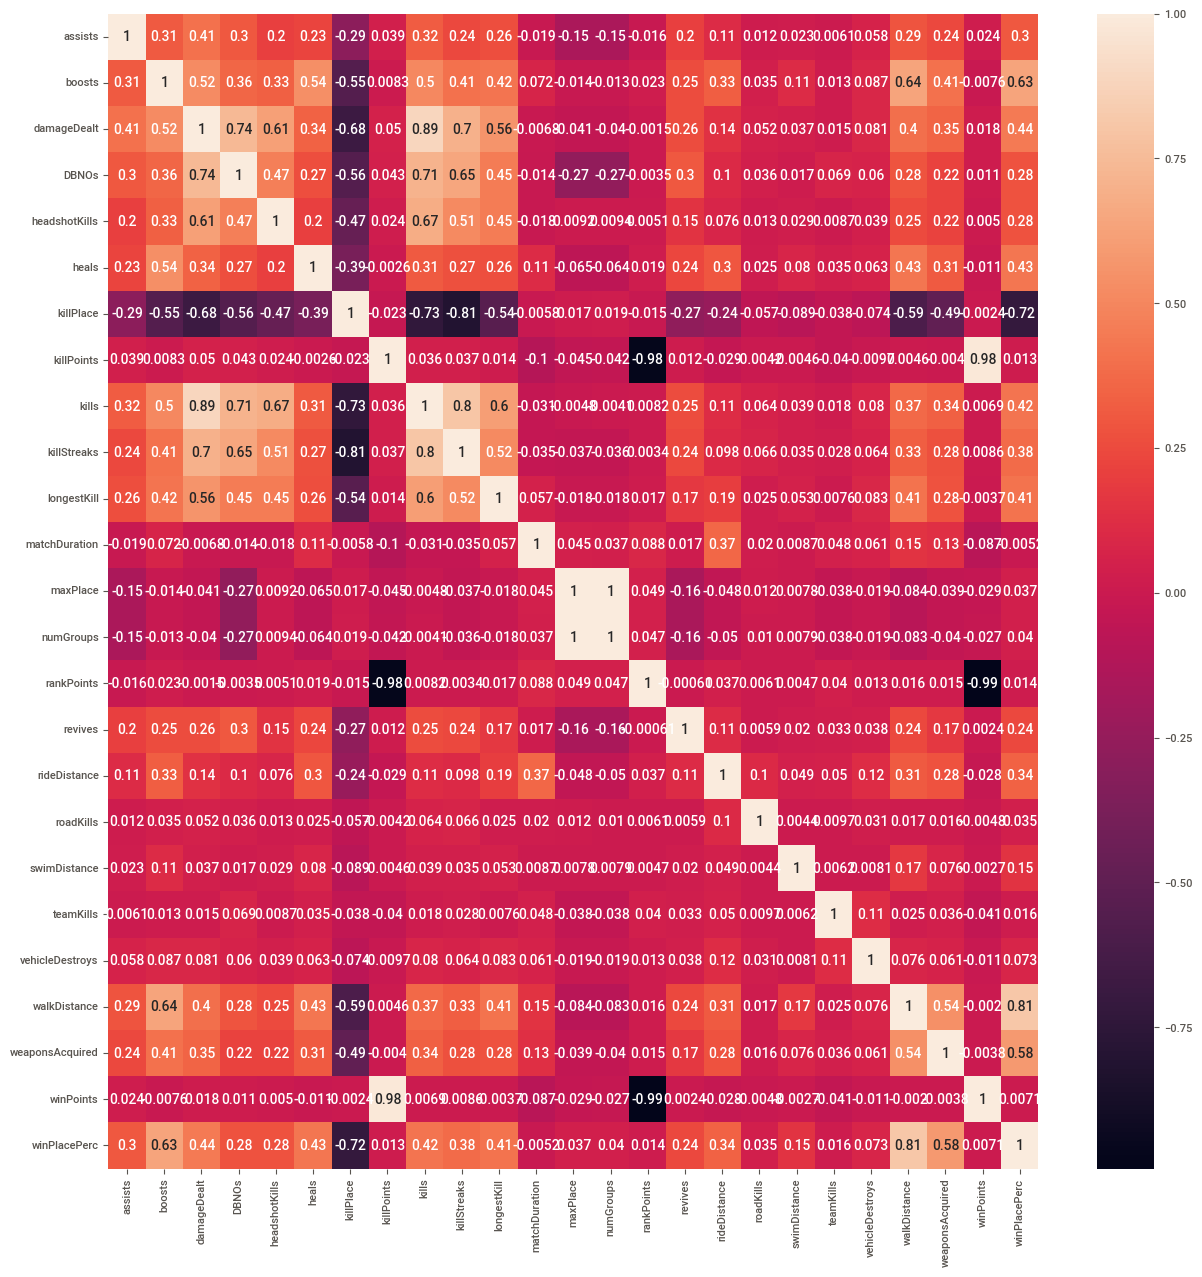

In [32]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=[15,15])
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

### Insights on Bivariate Analysis:
Bivariate analysis involves analyzing the relationship between two variables to understand how they are related to each other. Here are some insights gained through bivariate analysis:

#### - Correlation Analysis:
Pearson correlation coefficient: Bivariate analysis helps in calculating the strength and direction of the linear relationship between two continuous variables and Understanding correlation helps in identifying variables that are positively or negatively associated with each other.

#### - Heatmaps: 
Bivariate analysis includes creating heatmaps to visualize the correlation matrix between multiple variables. Heatmaps provide a comprehensive view of the relationships between variables and help in identifying clusters or groups of highly correlated variables. By conducting bivariate analysis, analysts can gain deeper insights into the relationships between variables, which is crucial for understanding patterns, making predictions, and informing decision-making processes.

### Preprocessing

In [35]:
# Check for duplicate data
df.duplicated().sum()


0

In [36]:
# Check for null value in data
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [37]:
# check row with null value win place perc
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [38]:
# remove that row 
df.drop(2744604, inplace = True)

In [39]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

### Understanding the Player distribution

In [41]:
df['playerjoined']=df.groupby('matchId')['matchId'].transform('count')
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerjoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


#### Kill Without Moving

In [43]:
df['totaldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
# prepare a data parameter to check for anamoly detection that
# the person has not moved but still managed to do the kills
df['killwithoutmoving']=((df['kills']>0) & (df['totaldistance']==0))

#### **Removing rows where players travel zero distance but still kill enemies. Only one or two players maximum could be in this situation.**
ges!

In [45]:
df[df['killwithoutmoving']==True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerjoined,totaldistance,killwithoutmoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [46]:
df[df['killwithoutmoving']==True].shape

(1535, 32)

In [47]:
# Drop the table 
df.drop(df[df['killwithoutmoving']==True].index , inplace=True)

In [48]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playerjoined',
       'totaldistance', 'killwithoutmoving'],
      dtype='object')

In [49]:
# ExtraOrdinary Road kills
df[df['roadKills']>=5].shape

(82, 32)

In [50]:
df.drop(df[df['roadKills']>=5].index , inplace= True)

#### So many kills =How?
In a match a player cannot not kill more that 20 kill

In [52]:
# Data Dimension 
df[df['kills']>20].shape

(417, 32)

In [53]:
# Drop the instances 
df.drop(df[df['kills']>20].index, inplace = True)

#### Head Shot

In [55]:
df['headshot_rate']=df['headshotKills']/df['kills']
df['headshot_rate']=df['headshot_rate'].fillna(0)

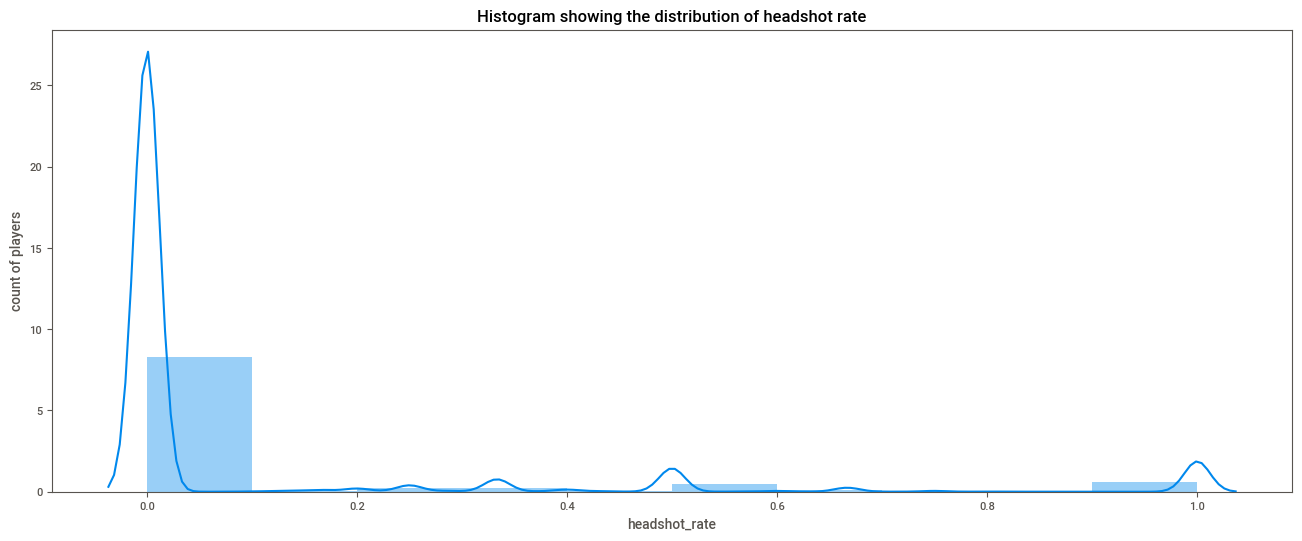

In [56]:
# Plot the headshot rate distribution
sns.distplot(df['headshot_rate'],bins=10).set_title('Histogram showing the distribution of headshot rate')
plt.ylabel('count of players')
plt.show()

In [57]:
df[(df['headshot_rate'] ==1) & (df['kills']>5)].shape

(187, 33)

In [58]:
df.drop(df[(df['headshot_rate']==1)& (df['kills']>6)].index,inplace=True)

#### Longest Shot

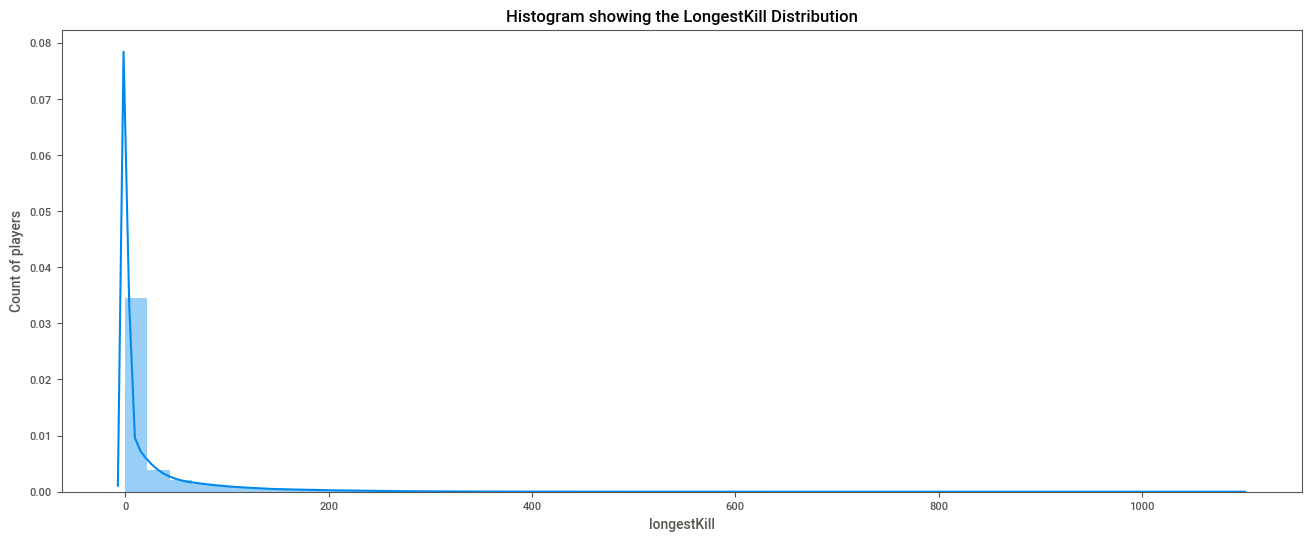

In [60]:
sns.distplot(df['longestKill'],bins=50).set_title('Histogram showing the LongestKill Distribution')
plt.ylabel('Count of players')
plt.show()

##### If a player can kill more than 500m distance it seem suspisious player so we remove those player.

In [62]:
df[df['longestKill']>=500].shape

(1747, 33)

In [63]:
df.drop(df[df['longestKill']>=500].index, inplace = True)

#### Weapon Change

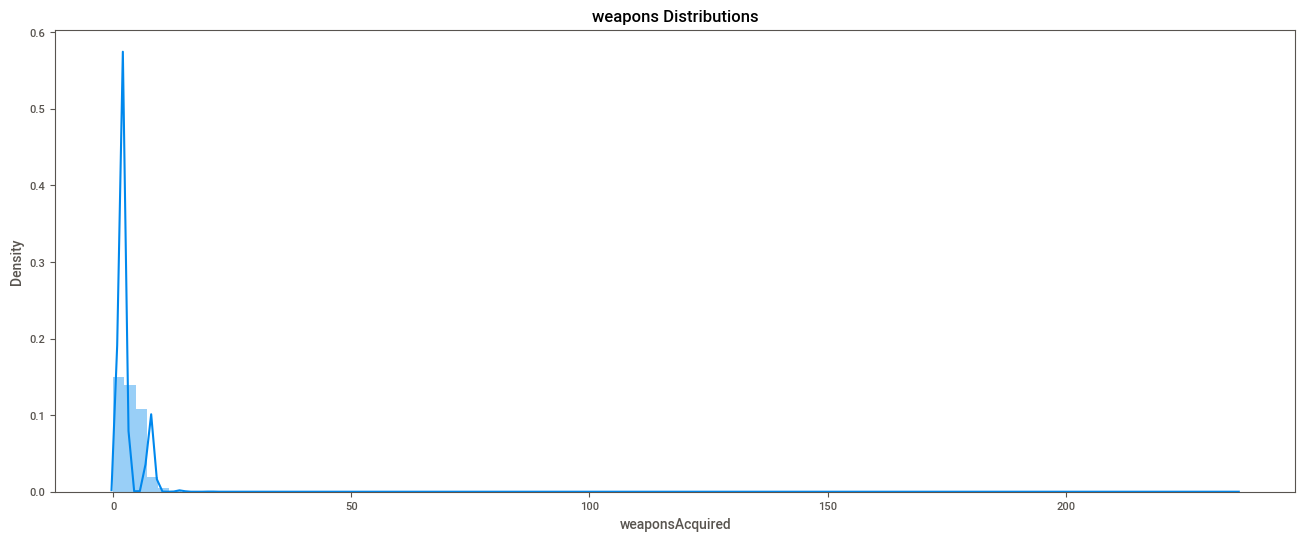

In [65]:
sns.distplot(df['weaponsAcquired'],bins=100).set_title('weapons Distributions')
plt.show()

In [66]:
df[df['weaponsAcquired']>=15].shape

(6809, 33)

In [67]:
df.drop(df[df['weaponsAcquired']>=15].index,inplace=True)

### Feature Engineering

In [69]:
normalising_factor=(100-df['playerjoined']/100)+1

In [70]:
df['killsNorm']=df['kills']* normalising_factor
df['damageDealtNorm']=df['damageDealt']* normalising_factor
df['maxPlaceNorm']=df['maxPlace']* normalising_factor
df['matchDurationNorm']=df['matchDuration']* normalising_factor

df['traveldistance']=df['walkdistance']=df['swimDistance']+df['rideDistance']
df['healsnboosts']=df['heals']+df['boosts']
df['assist']=df['assists']+df['revives']

In [71]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playerjoined',
       'totaldistance', 'killwithoutmoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'walkdistance', 'healsnboosts', 'assist'],
      dtype='object')

In [72]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration','killwithoutmoving'])

In [73]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,killwithoutmoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,walkdistance,healsnboosts,assist
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,False,0.0,0.00,0.0000,2801.12,130652.24,0.0000,0.0000,0,0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,False,0.0,0.00,9155.2323,2602.34,177859.93,11.0445,11.0445,0,0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,False,0.0,0.00,6801.3600,5001.00,131826.36,0.0000,0.0000,0,1
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,False,0.0,0.00,3292.9610,3102.79,143729.24,0.0000,0.0000,0,0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,False,0.0,100.03,10003.0000,9702.91,142442.72,0.0000,0.0000,0,0


### Handling Catogorical Data

In [75]:
data.columns

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'matchType', 'numGroups', 'rankPoints', 'roadKills',
       'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'playerjoined', 'totaldistance', 'headshot_rate',
       'killsNorm', 'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'walkdistance', 'healsnboosts', 'assist'],
      dtype='object')

In [76]:
data.matchType.unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-squad', 'crashtpp',
       'normal-solo', 'normal-duo'], dtype=object)

### Data Encoding

In [78]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data.matchType=lc.fit_transform(data.matchType)

In [79]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totaldistance,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,walkdistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,15,26,-1,0,...,244.8000,0.0,0.00,0.0000,2801.12,130652.24,0.0000,0.0000,0,0
1,0,0,57,0,0,0.00,15,25,1484,0,...,1445.0445,0.0,0.00,9155.2323,2602.34,177859.93,11.0445,11.0445,0,0
2,0,0,47,0,0,0.00,2,47,1491,0,...,161.8000,0.0,0.00,6801.3600,5001.00,131826.36,0.0000,0.0000,0,1
3,0,0,75,0,0,0.00,15,30,1408,0,...,202.7000,0.0,0.00,3292.9610,3102.79,143729.24,0.0000,0.0000,0,0
4,0,0,45,0,1,58.53,13,95,1560,0,...,49.7500,0.0,100.03,10003.0000,9702.91,142442.72,0.0000,0.0000,0,0


### Outliers Handling

Skipping column 'matchType' as it is non-numeric.


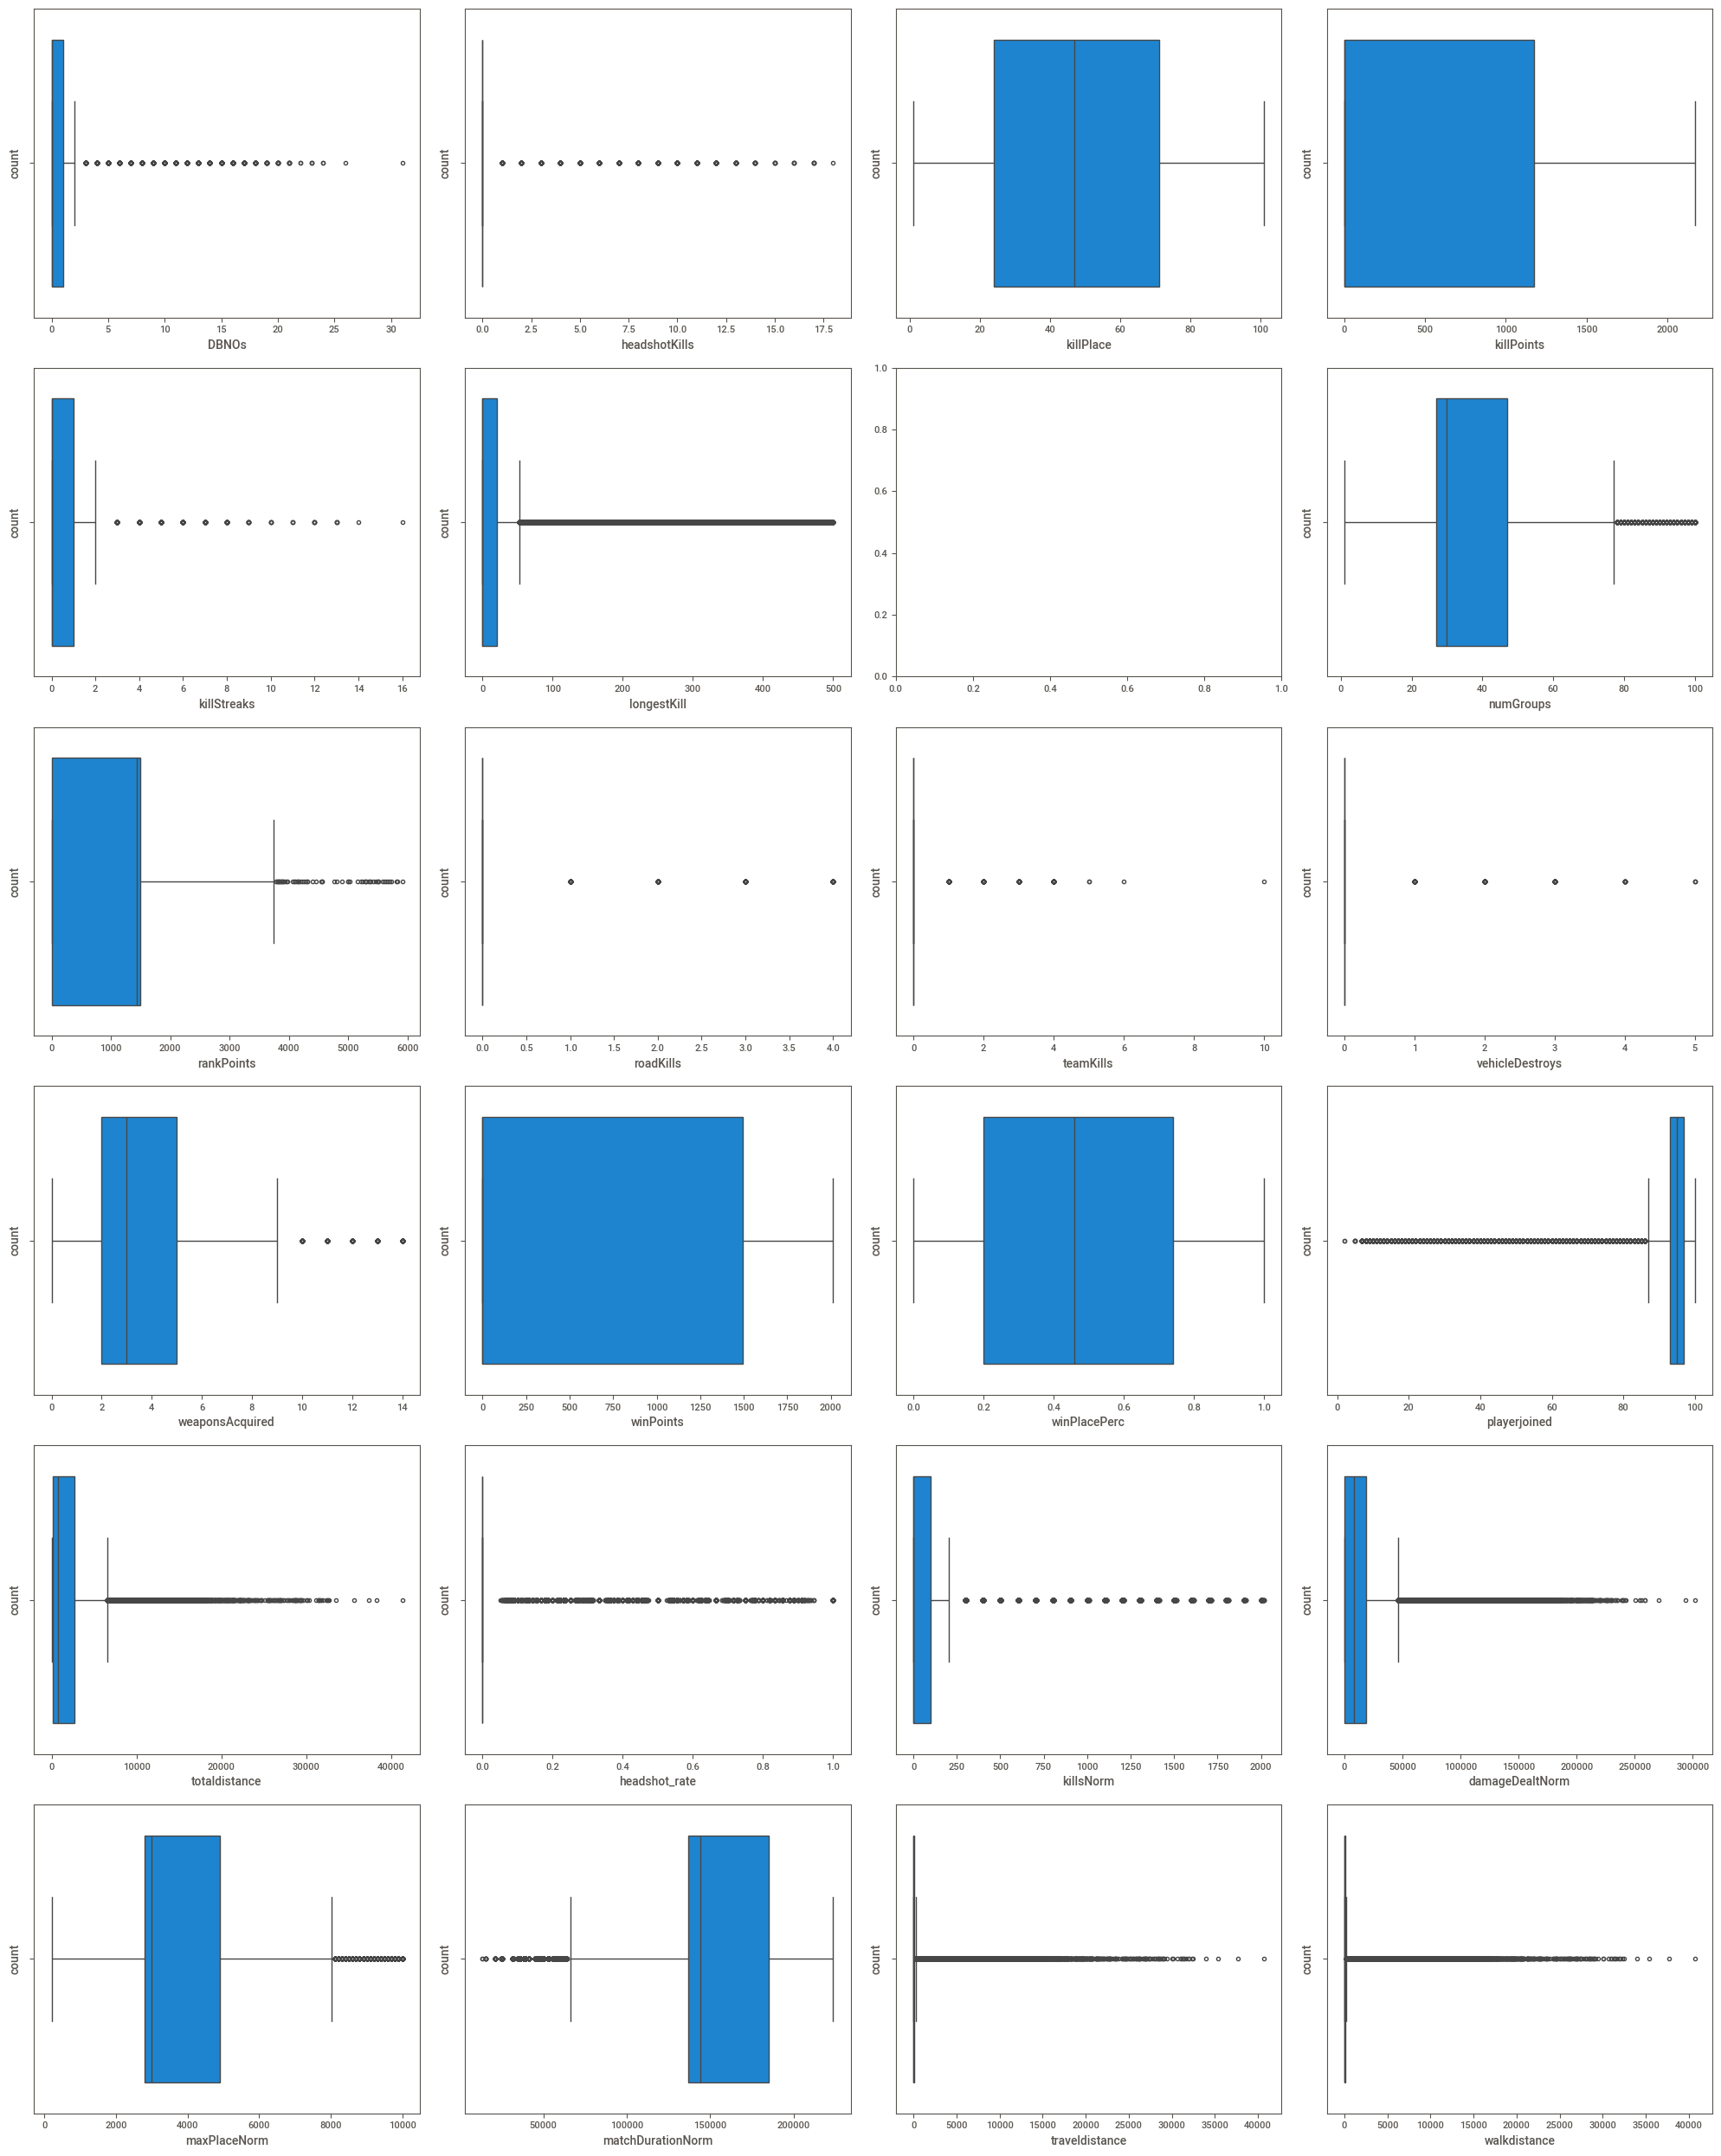

In [81]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in data.columns:
    if plotnumber <= 24:
        ax = plt.subplot(6, 4, plotnumber)
        # Check if the column is numeric before plotting
        if data[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
            sns.boxplot(x=data[column])
            plt.xlabel(column)
            plt.ylabel('count')
        else:
            print(f"Skipping column '{column}' as it is non-numeric.")
    plotnumber += 1

plt.tight_layout()
plt.show()

In [82]:
import numpy as np
from scipy import stats

col = 1
for c in data:  # Assuming data is your DataFrame
    if col <= 25:
        IQR = stats.iqr(data[c], interpolation='midpoint')
        print(c, 'IQR:', IQR)
        Q1 = data[c].quantile(0.25)
        Q3 = data[c].quantile(0.75)
        min_limit = Q1 - 1.5 * IQR
        print(c, 'min_limit:', min_limit)
        max_limit = Q3 + 1.5 * IQR
        print(c, 'max_limit:', max_limit, '\n')

        # Replace outliers with the median
        data.loc[(data[c] < min_limit) | (data[c] > max_limit), c] = np.median(data[c])

        # Double-check if outliers are replaced
        replaced_outliers = data.loc[(data[c] < min_limit) | (data[c] > max_limit), c]
        print(f"Replaced outliers in {c}:", replaced_outliers, '\n')

DBNOs IQR: 1.0
DBNOs min_limit: -1.5
DBNOs max_limit: 2.5 

Replaced outliers in DBNOs: Series([], Name: DBNOs, dtype: int64) 

headshotKills IQR: 0.0
headshotKills min_limit: 0.0
headshotKills max_limit: 0.0 

Replaced outliers in headshotKills: Series([], Name: headshotKills, dtype: int64) 

killPlace IQR: 47.0
killPlace min_limit: -46.5
killPlace max_limit: 141.5 

Replaced outliers in killPlace: Series([], Name: killPlace, dtype: int64) 

killPoints IQR: 1172.0
killPoints min_limit: -1758.0
killPoints max_limit: 2930.0 

Replaced outliers in killPoints: Series([], Name: killPoints, dtype: int64) 

killStreaks IQR: 1.0
killStreaks min_limit: -1.5
killStreaks max_limit: 2.5 

Replaced outliers in killStreaks: Series([], Name: killStreaks, dtype: int64) 

longestKill IQR: 21.12
longestKill min_limit: -31.68
longestKill max_limit: 52.8 

Replaced outliers in longestKill: Series([], Name: longestKill, dtype: float64) 

matchType IQR: 12.0
matchType min_limit: -15.0
matchType max_limit: 

In [83]:
x=data.drop(['winPlacePerc'],axis=1)
y=data['winPlacePerc']

In [84]:
features=x.columns

### Data Scaling

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x =scaler.fit_transform(x)


In [87]:
data.columns

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'matchType', 'numGroups', 'rankPoints', 'roadKills',
       'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'playerjoined', 'totaldistance', 'headshot_rate',
       'killsNorm', 'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'walkdistance', 'healsnboosts', 'assist'],
      dtype='object')

In [88]:
x

array([[-0.61783617,  0.        ,  0.44933484, ..., -0.17701338,
        -0.69938328, -0.50406949],
       [-0.61783617,  0.        ,  0.34004406, ...,  0.23370555,
        -0.69938328, -0.50406949],
       [-0.61783617,  0.        , -0.02425851, ..., -0.17701338,
        -0.69938328,  1.26777649],
       ...,
       [-0.61783617,  0.        ,  0.66791638, ..., -0.09579557,
        -0.69938328, -0.50406949],
       [ 0.92936735,  0.        , -1.33574779, ..., -0.17701338,
         1.63214863,  3.03962247],
       [-0.61783617,  0.        , -1.08073599, ..., -0.17701338,
         0.46638268, -0.50406949]])

In [89]:
y

0          0.4444
1          0.6400
2          0.7755
3          0.1667
4          0.1875
            ...  
4446961    0.1786
4446962    0.2935
4446963    0.4815
4446964    0.8000
4446965    0.5464
Name: winPlacePerc, Length: 4436270, dtype: float64

### Data Spliting

In [91]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size = 0.3, random_state = 20)

In [92]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3105389, 25) (3105389,)
(1330881, 25) (1330881,)


In [93]:
X_train

array([[-0.61783617,  0.        ,  1.14150973, ..., -0.17701338,
        -0.69938328, -0.50406949],
       [ 0.92936735,  0.        , -0.46142161, ..., -0.17701338,
        -0.69938328, -0.50406949],
       [-0.61783617,  0.        ,  1.14150973, ..., -0.17701338,
        -0.69938328, -0.50406949],
       ...,
       [-0.61783617,  0.        ,  0.41290458, ...,  4.04006545,
         0.85497133,  3.03962247],
       [-0.61783617,  0.        , -0.75286367, ..., -0.17701338,
        -0.31079463, -0.50406949],
       [-0.61783617,  0.        , -0.2064098 , ..., -0.17701338,
        -0.69938328, -0.50406949]])

##### Task 2:-Create a predictive model which is an attempt to predict the win probability of the Pubg match and to look at the important factors affecting the win probability of the pubg game.

### Model Building

In [96]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Model Evaluation

In [98]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
    'LinearRegression': LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
    

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 0.1446
- Mean Absolute Error: 0.1059
- R2 Score: 0.7785
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1442
- Mean Absolute Error: 0.1056
- R2 Score: 0.7795


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0022
- Mean Absolute Error: 0.0000
- R2 Score: 0.9999
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1181
- Mean Absolute Error: 0.0819
- R2 Score: 0.8523


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.0830
- Mean Absolute Error: 0.0594
- R2 Score: 0.9270
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0833
- Mean Absolute Error: 0.0596
- R2 Score: 0.9264


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1387
- Mean Absolute Error: 0.1055
- R2 Score: 0.7963
------------

##### Best 2 Predictive models to predict the win probability of the Pubg match are:- XGBRegressor(accuracy-92%) and GradientBoostingRegressor (accuracy-82%)

### Important Features

In [ ]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

##### Important factors affecting the win probability of the pubg game, as shown in the plot are:- totaldistance, killplace, killStreaks and healboosts

### Model Comparison Report

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(model_list, r2_list, color='skyblue')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Score for Different Models')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Create a DataFrame to store the evaluation results
evaluation_df = pd.DataFrame({'Model': model_list, 'R2 Score': r2_list})

# Print the DataFrame
print(evaluation_df)

# If you want to display the DataFrame as a table in a Jupyter Notebook or Google Colab, you can simply do:
display(evaluation_df)

### Challenges Faced

##### 1. **Handling Missing Values:**
A significant challenge encountered during the analysis was addressing missing values within the dataset. Several features had missing data, which needed to be resolved prior to model training. To manage this issue, we utilized imputation techniques, including mean imputation for numerical features and mode imputation for categorical variables.

##### 2. **Feature Engineering:**
The raw dataset contained numerous features, some of which were redundant or irrelevant to the prediction task. Effective feature engineering was essential for selecting pertinent features and generating new informative variables. Techniques such as correlation analysis and recursive feature elimination were employed to identify the most predictive features for the model.

##### 3. **Addressing Data Imbalance:**
The dataset exhibited class imbalance, with a disproportionate number of matches resulting in specific outcomes (win/loss). This imbalance posed a risk of biasing the model's predictions. To mitigate this issue, we applied techniques like oversampling the minority class and utilized evaluation metrics, such as the F1-score, to better assess model performance.

##### 4. **Model Selection:**
Selecting the appropriate machine learning algorithm for the task was another challenge. We explored various models, including linear regression, decision trees, ensemble methods (such as Random Forest and Gradient Boosting), and advanced algorithms like XGBoost. The selection process was based on key factors, including predictive accuracy, model interpretability, and computational efficiency.


### Techniques Used

##### 1. **Data Preprocessing:**
A comprehensive data preprocessing pipeline was implemented, encompassing steps such as handling missing values, feature scaling, encoding categorical variables, and performing feature selection to ensure the dataset was fully prepared for model training.

##### 2. **Feature Engineering:**
Feature engineering was a critical component in enhancing the model's performance. We created new features, such as kill-death ratio, player rating, and team size, to extract additional relevant information and improve the prediction task’s accuracy.

##### 3. **Ensemble Learning:**
Ensemble learning techniques, including Random Forest and Gradient Boosting, were utilized due to their ability to capture complex relationships within the data and deliver robust predictions. These models combine multiple weak learners to enhance overall performance and improve generalization to unseen data.
 for clarity.

### Conclusion
After evaluating different machine learning models on the given dataset, it is clear that the XGBRegressor performs the best in predicting PUBG winners. This conclusion is based on key performance metrics, such as a Root Mean Squared Error (RMSE) of 0.0830, a Mean Absolute Error (MAE) of 0.0594, and a high R² Score of 0.9270 (92.7%), indicating that the model explains 92.7% of the variance in the data, which demonstrates its high accuracy.
                                                                                                                                                                                                                                                                                                   

Additionally, when we analyze which in-game features have the most impact on predicting the winner, we find that certain factors are crucial. The most important features include totaldistance (distance traveled by the player), killplace (player’s rank based on kills), killStreaks (number of consecutive kills), and healboosts (use of healing items and boosts), all of which significantly contribute to the model’s ability to accurately predict the winner of the match.